## LA Parking Citation - EDA Part II

<br> 

### Introduction

This is the second of a four-part exploratory data analysis project on an open source parking citation dataset. The project utilizes Python and several of its numerical packages (NumPy, SciPy, Matplotlib, Pandas, GeoPandas). The dataset I used for this EDA is available for free on [Kaggle](https://www.kaggle.com/) or at the Los Angeles open source data [website](https://data.lacity.org/). 


In this post, we're going to explore the date-time variables associated with this citation dataset. We'll take a look into when citations are given throughout the day, week, and year. We'll also examine revenue trends, and how many citations are issued on special days of the week or year. 

### Load Libraries


We'll be using numpy, scipy, pandas, and matplotlib in this portion of the EDA. 

In [113]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<br> 

### Combine Datasets

If you read my previous post, L.A. Parking Citations - EDA Part I, you'll recall that we broke the dataset up into four parts in order to save easily store it in a repository. Now that we're looking to work with the dataset once again, we need to combine these pieces back together. 

In [114]:
# load individual sets
la_ticket_2017_1 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_1.csv")
la_ticket_2017_2 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_2.csv")
la_ticket_2017_3 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_3.csv")
la_ticket_2017_4 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_4.csv")

In [115]:
# combine dataset
la_ticket_2017 = pd.concat([la_ticket_2017_1, la_ticket_2017_2, la_ticket_2017_3, la_ticket_2017_4])

In [116]:
# view dataset
la_ticket_2017.head()

,Unnamed: 0,Issue time,Meter Id,RP State Plate,Make,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude,Month,Day,Day of Year
0,2777524,104.0,NaN,OR,TOYT,BL,1822 WINONA BLVD,80.56E4+,RED ZONE,93.0,6.470239e+06,1.860397e+06,3,1,60
1,2777558,1050.0,NaN,CA,HOND,BK,710 EL CENTRO AV,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,3,28,87
2,2827647,115.0,NaN,CA,HOND,GY,7502 WILLIS AVENUE,22500E,BLOCKING DRIVEWAY,68.0,6.424012e+06,1.897916e+06,1,3,3
3,2827648,126.0,NaN,CA,FORD,WT,14957 FRIAR STREET,5204A-,DISPLAY OF TABS,25.0,6.422948e+06,1.890266e+06,1,3,3
4,2827649,132.0,NaN,CA,HOND,BK,14634 SYLVAN ST,22514,FIRE HYDRANT,68.0,6.425072e+06,1.889888e+06,1,3,3


<br> 

### Citations by Day of the Year

Previously, we created the 'Day of Year' variable, visible in the above dataset. This variable will be useful in understanding trends in the number of citations issued throughout the year, and will allow us to easily transform the date-time data.

Let's have a look at this variable now. 

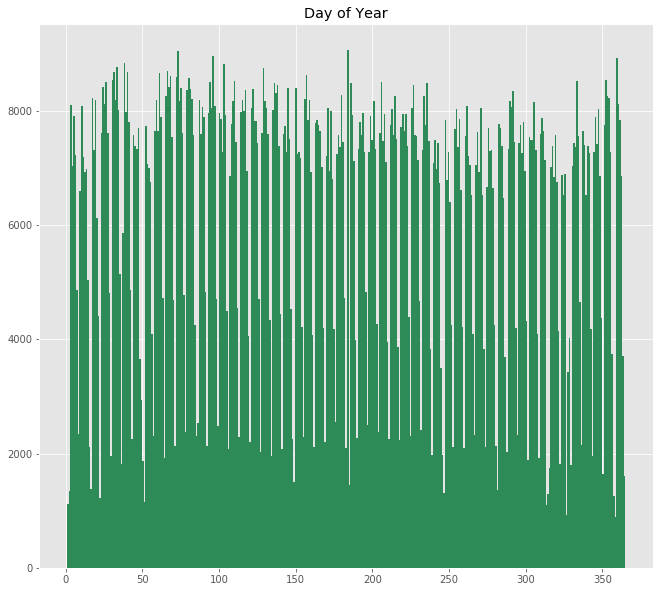

In [211]:
la_ticket_2017.hist('Day of Year', bins=365, color = 'seagreen')

plt.rcParams['figure.figsize'] = (10,8)

<br> 

I've binned the results such that each bar correpsonds to each day of the year. Number of citations issued is described on the y-axis, and the sequential day of the year is described on the x-axis. 

This visualization makes a few things apparent. First, it's apparent that at least 500 parking citations are given each and every day. Citations issued max out at around 9000 in a single day. There are three distinct levels of citations being issued. Daily totals cluster at ~2500, ~4000, and ~7500 citations issued. 

Let's see if these clusters hold when we examine how much revenue is generated, each day, on average. To visualize revenue generated, we can sum the 'Fine amount' variable as grouped by the day of the year and then create a density plot from this data. 

<br>

In [118]:
sum_fine_by_day = la_ticket_2017.groupby('Day of Year')['Fine amount'].sum()

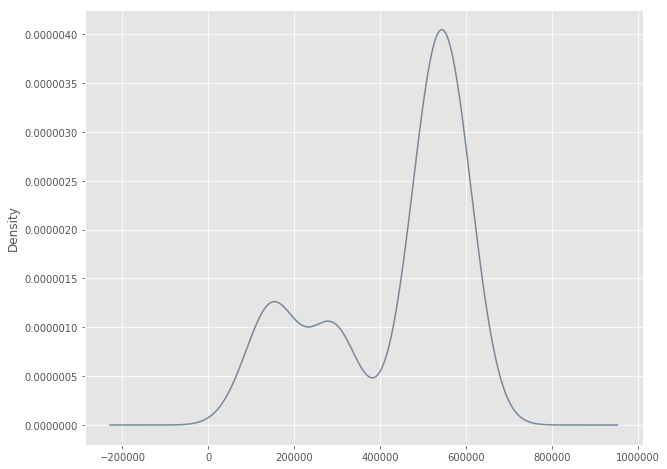

In [212]:
sum_fine_by_day.plot.density(color = 'lightslategray')
plt.rcParams['figure.figsize'] = (10,8)

<br>

The groupings hold after transforming the data in terms of revenue. We can see three peaks in average daily revenue. A local maxima is appears at approxamatly \$175,000, and another at \$300,000. These peaks likely correspond to 2500 and 4000 citation groupings. A much larger global maxima arises at just under \$600,000$. This correpsonds to most frequeny grouping of daily citations issued, ~7500. 

It's intersting to see that a typical day will generate between $150000 and $600000 in revenue from parking citations. 

Now that we're sure that there is a discernable pattern in daily citations issued, let's explore what dictates that pattern. Parking regulations typically change in accordance to the day of the week. For example, many cities have no meter tolls on Sundays. It's possible that changes in regulation and enforcement throughout the week result in these groupings. 

To investigate this hypothesis, we'll transform and visualize the data in terms of 'day of the week'. 

<br> 


### Citations by Day of the Week

First we'll create a dedicated Pandas Series that holds information on parking citations issued per day. That way we don't have to re-run groupby and count commands each time we want to access data organized in this fashion. 

In [150]:
# create a ticket count for each day
tickets_by_day = la_ticket_2017.groupby('Day of Year').count()
# create a stand alone series
ticket_by_day = tickets_by_day.iloc[:,0]
# show created series
ticket_by_day.head()

Day of Year
1    1115
2    1344
3    8109
4    7035
5    7916
Name: Unnamed: 0, dtype: int64

<br>

Next we'll test out creating a Day of the Week variable on Sunday. The first day of 2017 was a Sunday, so that means that 'Day of Year' number 1, 8, 15, ... were all Sundays. We can loop through the Series collecting these Sundays and stuffing them into a new variable. 

<br> 

In [121]:
i = 1 
sunday = []

# while counter is within dataset
while i <= len(ticket_by_day):
    # extract element and append to results array
    sunday.append(ticket_by_day[i])
    # proceed to next week
    i = i + 7

# format and display results
np.hstack(sunday)

array([1115, 2348, 2112, 1224, 1952, 1822, 2251, 1865, 2304, 1931, 2142,
       2372, 2312, 2131, 2479, 2074, 2295, 2200, 2020, 1964, 2087, 2257,
       2285, 2110, 2196, 2553, 2099, 2271, 2499, 2386, 2257, 2243, 2316,
       2407, 1972, 1969, 2124, 2095, 2328, 2115, 2140, 2026, 2319, 1892,
       1920, 1740, 1821, 1803, 2147, 1965, 1642, 1255, 1604])

<br> 

Success!

Now we can create a more general function to apply this process to each day of the week.

<br> 

In [122]:
# define the function name
def by_weekday(day):
    # set the counter equal to the arguement
    i = day
    # create an empty array for results
    day = []
    
    # apply while loop to extract data
    while i <= 365:
        day.append(ticket_by_day[i])
        i = i + 7
    
    # format data
    np.hstack(day)
    day = pd.Series(day)
    
    # return results
    return(day)


In [153]:
# testing the function on Sunday
sunday = by_weekday(1)
sunday.head()

0    1115
1    2348
2    2112
3    1224
4    1952
dtype: int64

<br> 

Testing the function on Sunday, we produce the same results as above. Now we can proceed to apply this to each day of the week, creating seven new Pandas Series, then combining them into another DataFrame. 

<br>

In [154]:
monday = by_weekday(2)
tuesday = by_weekday(3)
wednesday = by_weekday(4)
thursday = by_weekday(5)
friday = by_weekday(6)
saturday = by_weekday(7)

In [125]:
ticket_by_weekday = pd.concat([sunday, monday, tuesday, wednesday, thursday, friday, saturday], axis = 1)
ticket_by_weekday.columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ticket_by_weekday.head()

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1115,1344.0,8109.0,7035.0,7916.0,7233.0,4859.0
1,2348,6604.0,8087.0,7204.0,6939.0,6980.0,5040.0
2,2112,1375.0,8229.0,7312.0,8201.0,6128.0,4409.0
3,1224,7612.0,8431.0,8127.0,8511.0,7610.0,4806.0
4,1952,8542.0,8678.0,8203.0,8767.0,8016.0,5149.0


<br> 

Great, the dataset is now in terms of 'day of the week'. Let's visualize this transformation. 

<br> 

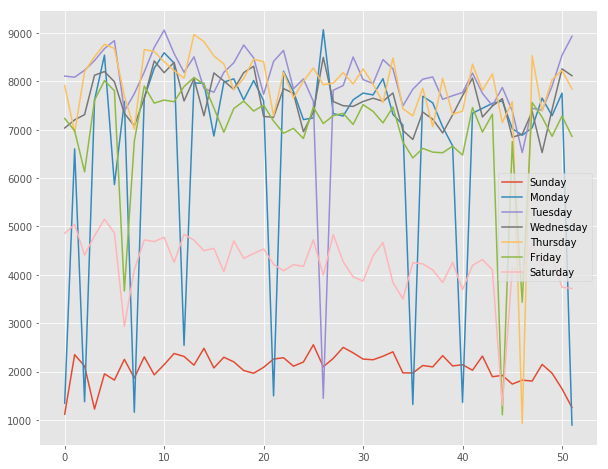

In [213]:
ticket_by_weekday.plot()
plt.rcParams['figure.figsize'] = (10,8)

<br> 

A beautiful visualization if I do say so myself! It looks like my hunch that the groupings were based on day of the week, was correct. Sunday regularly produces around 2000 citations. Saturday regularly produces 45000 citations. The weekdays average around 7000 to 8000 citations. This graph is a bit hard to follow, the data might be easier to understand if we visualize it as a series of boxplots. 

<br> 

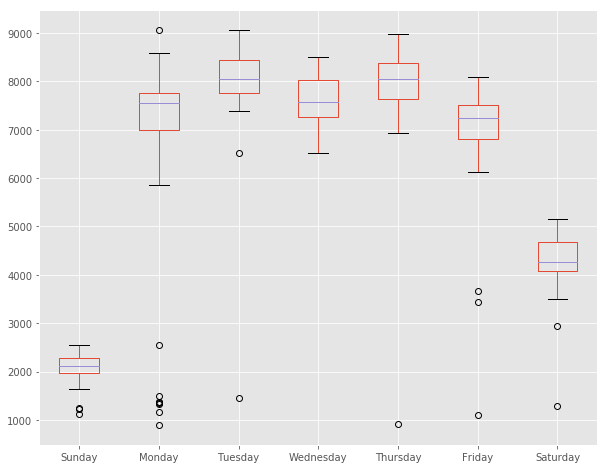

In [214]:
ticket_by_weekday.boxplot()
plt.rcParams['figure.figsize'] = (10,8)

<br> 

This makes the mean citations issued much more clear. There is a very distinct difference between the number of citations issued on Sundays versus Mondays. But is there a difference between the weekdays? We can do a series of statistical tests to see if the means are significantly different. 

There are many procedures to test if two sample means are significantly different. One of the most straightforward is the t-test. Let's conduct a two population t-test on the Sunday and Monday data to be sure that the difference observed in the visualization is statistically significant. 


<br> 

In [189]:
import warnings
warnings.filterwarnings('ignore')

# drop the 53rd sunday (removing NA's) to make sample sizes equal
ticket_by_weekday = ticket_by_weekday.drop([52,])

KeyError: '[52] not found in axis'

In [156]:
# t-test Sunday and Monday
stats.ttest_ind(ticket_by_weekday['Sunday'], ticket_by_weekday['Monday'])

Ttest_indResult(statistic=-14.114555018346483, pvalue=9.993642210838924e-26)

<br> 

The mean number of citations issued on Sundays is statistically different than the mean number of citations issued on Mondays. Instead of doing t-tests by hand for all of of the pairs, let's write a little loop that will do the leg work for us. 

<br> 

In [131]:
# initial day to compare
for day in range(7):
    # second day for the comparison
    for day_2 in range(day+1, 7):
        # print the days being compared
        print(list(ticket_by_weekday)[day], list(ticket_by_weekday)[day_2])
        # conduct the t-test
        print(stats.ttest_ind(ticket_by_weekday.iloc[:,day], ticket_by_weekday.iloc[:,day_2]))

Sunday Monday
Ttest_indResult(statistic=-14.114555018346483, pvalue=9.993642210838924e-26)
Sunday Tuesday
Ttest_indResult(statistic=-39.200105865818514, pvalue=2.5709275857822333e-63)
Sunday Wednesday
Ttest_indResult(statistic=-70.26192329299684, pvalue=3.3199297166490703e-88)
Sunday Thursday
Ttest_indResult(statistic=-36.573858454513214, pvalue=1.9044297958758257e-60)
Sunday Friday
Ttest_indResult(statistic=-28.946699561781212, pvalue=5.397450684984687e-51)
Sunday Saturday
Ttest_indResult(statistic=-23.6204632589478, pvalue=3.772390749169104e-43)
Monday Tuesday
Ttest_indResult(statistic=-3.7245765466041916, pvalue=0.0003209744709376137)
Monday Wednesday
Ttest_indResult(statistic=-2.931192014701394, pvalue=0.004168140587481362)
Monday Thursday
Ttest_indResult(statistic=-3.4884588693442655, pvalue=0.0007185137137979519)
Monday Friday
Ttest_indResult(statistic=-0.8990678820480197, pvalue=0.37073406361282246)
Monday Saturday
Ttest_indResult(statistic=7.205958264020363, pvalue=1.0242512878

<br> 

These results aren't pretty, but they do the job! Running through the results, we can see that Sunday is significantly different from each of the other days of the week. Monday and Friday are not significantly different, however Monday and Wednesday are. There is no meaningful differene between Tuesday and Thursday. The average number of citations issued on Saturday is significantly different from each of the other days of the week as well. 

That explains our daily-citation groupings!

Let's mull over the date-time data from another perspective, and see if we can come up with any more interesting insights. 


<br>


### Citations By Month

Tickets issued by month. In the previous data-wrangling post, we created a stand-alone 'Month' variable for each citation. Let's visualize these now and see if there's anything interesting to look at. 

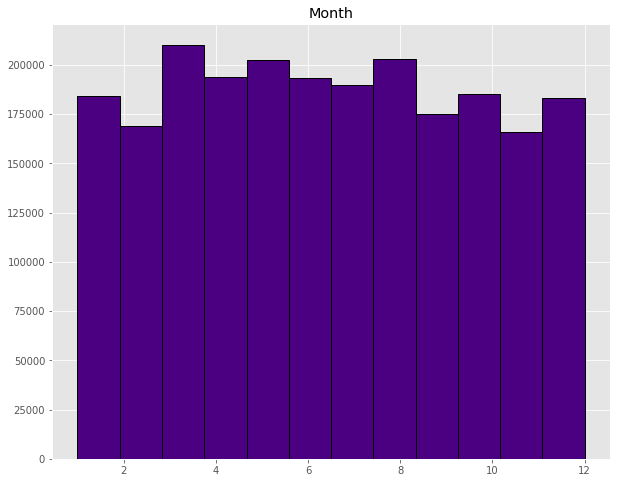

In [216]:
la_ticket_2017.hist('Month', bins=12, color = 'indigo', edgecolor='black', linewidth=1)
plt.rcParams['figure.figsize'] = (10,8)

<br> 

A fairly uniform distribution throughout the year. the effect of a short February is evident in the total tickets issued. It seems that November is also a bit slower of a month. There doesn't seem to be any pattern to speak of here. How about a patern within the month?

<br>

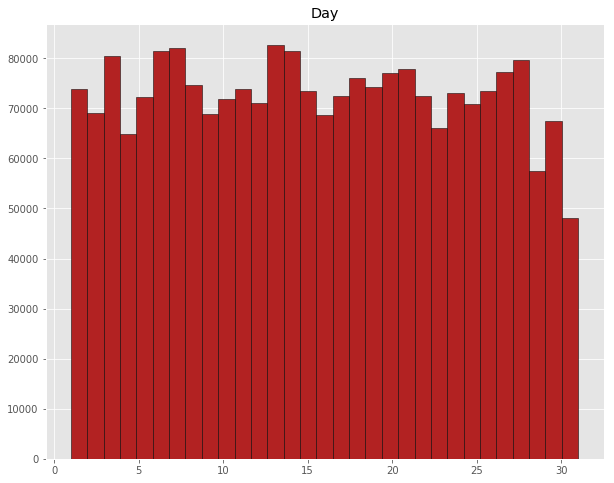

In [217]:
la_ticket_2017.hist('Day', bins=31, color = 'firebrick', edgecolor = 'black')
plt.rcParams['figure.figsize'] = (10,8)

<br>

We see a sharp decline in tickets issued on the 29th, 30th, and 31st days of the month. This can likely be attributed to Not all months having a 29th, 30th, and 31st day. Let's see what happens when we remove the effect of February. 
Nothing suprising here, last 29, 30, 31 drop off due to not being in every month. 

<br>

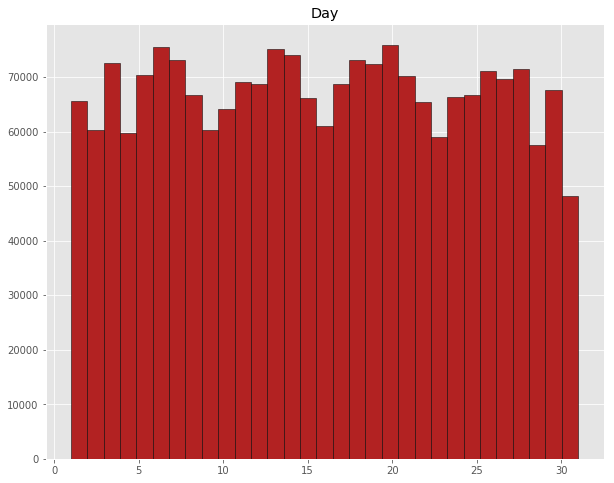

In [218]:
la_ticket_2017[la_ticket_2017['Month'] != 2].hist('Day', bins = 31, color = 'firebrick', edgecolor = 'black')
plt.rcParams['figure.figsize'] = (10,8)

<br> 

Removing February helps days number 29 and 30 close the previously visualized gap. Other than that, there isn't much of a difference. 

<br>

<br> 

### Citations by Hours

When visualizing the time a citation is issued, we can expect to see some big trends. Parking enforcement hours, typically sometime between 8am and 5pm, should see a huge surge in citations. The early morning hours should see barely any citations.

Let's see what kind of story the data tells us this time. 

<br>

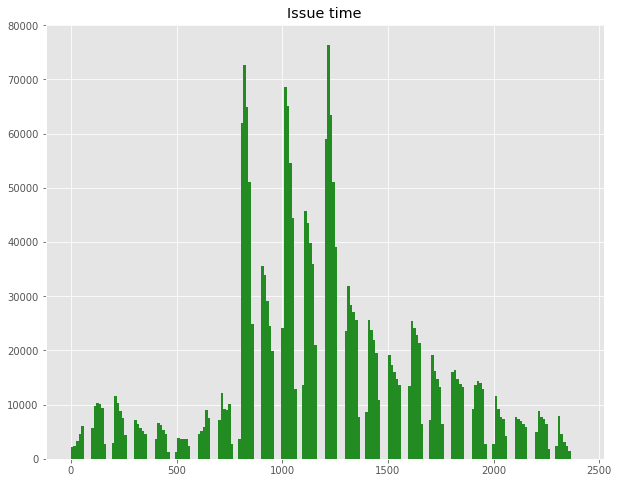

In [219]:
la_ticket_2017.hist('Issue time', range=(0, 2400), bins=200, color = 'forestgreen')
plt.rcParams['figure.figsize'] = (10,8)

<br> 

This histogram has been binned into 200 columns. This means that each hour has a six, ten-minute columns, and tehre are several columns of space between the hours (there is no 10:70 AM). 

Like we predicted, there are very few citations issued at 5 AM. A massive spike of citations, from a total of 5000, to over 70,000 occurs early on in the 8 o'clock hour. We'll have to take a closer look at this hour specifically. There's a lul of enforcement after tha, and again a jump at 10 AM. 

It would appear that the parking officers get a bit lazy after lunch; citations issued drop by half, and steadily decline thereafter. 

<br>

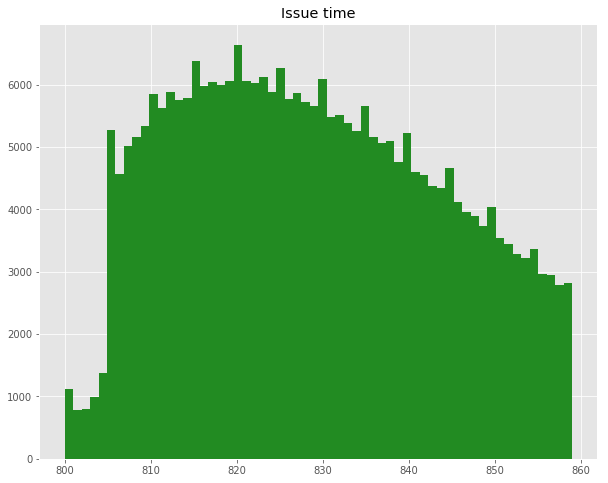

In [220]:
la_ticket_2017.hist('Issue time', range=(800, 859), bins=60, color = 'forestgreen')
plt.rcParams['figure.figsize'] = (10,8)

<br> 

Nearly a 500% increase in citations issued between 8:04 AM and 8:05 AM. Perhaps that 4 minutes is the time it takes the official to track down their first victim after clocking in at 8:00 AM. Either way, it's handy information to have. 

It's also clear that citatins group around the 5 minute interval, suggesting that officers have the ability to round the issue time, and sometimes utilize that liberty. I would have thought an electronic clock would time-stamp each citation, but apparently not. 

<br> 

<br> 

### Citations on Holidays

Finally, let's seperate a number of specific days of the year, and see how many citations are issued on these days as compared to other, 'normal' days. I'm talking seeing if parking officers feel the holiday spirit, or do they play the part of the grinch?



In [222]:
# these are the holidays that came to my mind and their dates in 2017
holidays = pd.Series(['2017/01/01',
                      '2017/01/16',
                      '2017/02/14',
                      '2017/05/29',
                      '2017/07/04',
                      '2017/09/04',
                      '2017/10/31',
                      '2017/11/10',
                      '2017/11/23',
                      '2017/12/25'],
                     index = ['New Years Day',
                              'MLK Day',
                              'Valentines Day',
                              'Memorial Day',
                              'Independence Day',
                              'Labor Day',
                              'Halloween',
                              'Veterans Day',
                              'Thanksgiving',
                              'Christmas']
                    )

holidays

New Years Day       2017/01/01
MLK Day             2017/01/16
Valentines Day      2017/02/14
Memorial Day        2017/05/29
Independence Day    2017/07/04
Labor Day           2017/09/04
Halloween           2017/10/31
Veterans Day        2017/11/10
Thanksgiving        2017/11/23
Christmas           2017/12/25
dtype: object

In [223]:
# change the date format to day of the year for easy use
holidays_date = pd.to_datetime(holidays, format='%Y/%m/%d')
holidays_doy = holidays_date.dt.dayofyear
holidays_doy

New Years Day         1
MLK Day              16
Valentines Day       45
Memorial Day        149
Independence Day    185
Labor Day           247
Halloween           304
Veterans Day        314
Thanksgiving        327
Christmas           359
dtype: int64

<br> 

After defining some holidays to look into, I'm going to count the number of tickets given on each of these days, and save the results to a new, 'holiday_tickets' Pandas DataFrame. 

<br>

In [224]:
# create the empty dataframe, named after each holiday
holiday_tickets = pd.DataFrame(columns=['Number of Tickets'], index = holidays_doy.index)


In [225]:
# set a counter equal to zero
i = 0

# for each of the hoidays
while i <= len(holidays_doy) - 1:
    # sum the number of tickets given on that day and save the output to the new DataFrame
    holiday_tickets.iloc[i, ] = sum(la_ticket_2017['Day of Year'] == holidays_doy.iloc[i])
    # move to the next holiday
    i = i + 1

<br> 

If that worked correctly, this should give us a bar plot of how many tickets are given on each of the predescribed holidays. 

<br> 

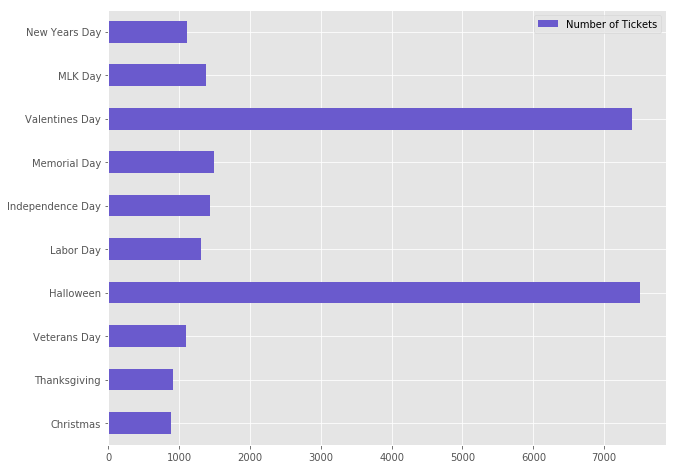

In [226]:
holiday_tickets.plot(kind = 'barh', color = 'slateblue').invert_yaxis()
plt.rcParams['figure.figsize'] = (10,8)

<br>

Most holidays have far fewer tickets than the ~6000 citation daily average, That is with the exception of Halloween and Valentines day. I would assert that these are not federally recognized holidays, and therefore there is no change in enforcement. 

In fact, I don't believe that parking citation officers are feeling more lenient, they just get the day off! 

Here's the associated table. 

<br>

In [144]:
holiday_tickets

,Number of Tickets
New Years Day,1115
MLK Day,1375
Valentines Day,7388
Memorial Day,1496
Independence Day,1445
Labor Day,1318
Halloween,7498
Veterans Day,1104
Thanksgiving,922
Christmas,893


<br> 

Christmas turns out to have less citations than any other holiday, is it the least cited day of the entire year?

<br> 

In [146]:
ticket_by_day.min()

893

<br> 

I guess even the parking scruges feel a little bit of Christmas spirit!

<br> 

### Conclusions

In conclusion, you should park in L.A. at 5 AM on Christmas Day, especially if it's a Sunday. If you park on a illegally on a Tuesday or Thursday at 8:20 AM or 12:10 PM, expect to pay! 

You should definitly double check the parking signs between 8 AM and 1 PM on the weekdays, and don't expect the citation officers to give you a break for Valentines Day!

There's so much information stored in date-time variables, I think that's what makes them so fun to work with. On the next segment of the L.A. Parking Citation Series, I'll be looking into the spatial variables! WHere are citations issued? Where are the most grevious parking meters? 

Perhaps by combining the upcoming spatial analysis and this date-time information, you could peice together a devious plan to avoid those pesky parking citations!

Untill next time, 

\- Fisher 